In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
properties_df = pd.read_csv('properties.csv')

# Display the first few rows of the dataset and its summary
properties_head = properties_df.head()
properties_summary = properties_df.describe(include='all')

properties_head, properties_summary

(   PropertyID     Location  Size_sqft  SalePrice
 0        2001       Suburb       2996     355372
 1        2002     Downtown       2887     505830
 2        2003       Suburb        957     338789
 3        2004  Countryside       1814     419335
 4        2005       Suburb        850     357301,
          PropertyID Location    Size_sqft      SalePrice
 count    100.000000      100   100.000000     100.000000
 unique          NaN        3          NaN            NaN
 top             NaN   Suburb          NaN            NaN
 freq            NaN       40          NaN            NaN
 mean    2050.500000      NaN  1832.410000  401866.300000
 std       29.011492      NaN   695.535926  116274.958848
 min     2001.000000      NaN   806.000000  205943.000000
 25%     2025.750000      NaN  1154.000000  303015.500000
 50%     2050.500000      NaN  1816.000000  403301.500000
 75%     2075.250000      NaN  2438.000000  506435.250000
 max     2100.000000      NaN  2996.000000  598378.000000)

In [2]:
import seaborn as sns
colors = sns.color_palette('viridis', 10)

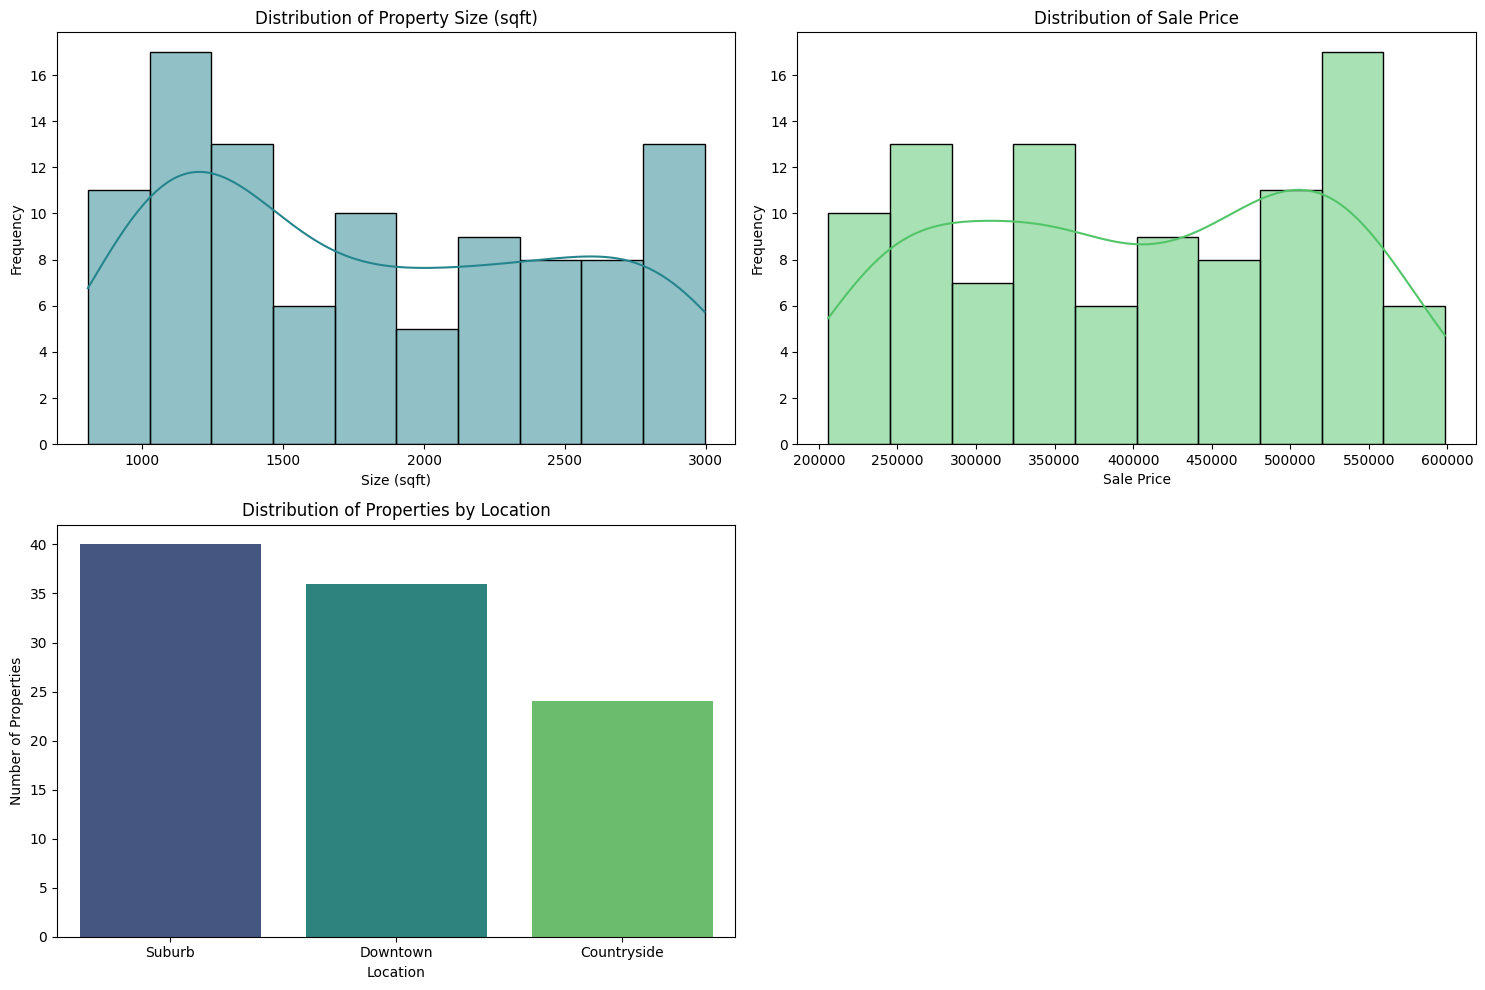

In [3]:
# Adjusting the color scheme for all three charts based on the 'viridis' palette

# Initialize the figure
plt.figure(figsize=(15, 10))

# Setting up the color palette
colors = sns.color_palette('viridis', 10)

# Plotting histograms with adjusted color scheme for Size_sqft and SalePrice
plt.subplot(2, 2, 1)
sns.histplot(properties_df['Size_sqft'], kde=True, color=colors[4], bins=10)
plt.title('Distribution of Property Size (sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(properties_df['SalePrice'], kde=True, color=colors[7], bins=10)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Plotting a bar chart for Location with the same color scheme
plt.subplot(2, 2, 3)
sns.countplot(data=properties_df, x='Location', palette='viridis')
plt.title('Distribution of Properties by Location')
plt.xlabel('Location')
plt.ylabel('Number of Properties')

plt.tight_layout()
plt.show()

# Distribution of Property Size:
# There's a clear peak for properties sized between 1.000 and 2.000 sqft. 
# We also observe a higher frequency in the range of 2.500 to 3.000 sqft
# Distribution of Sale Price:
# The sale price seem to have peaks in the $300.000 to $400.000 range and the
# $500.000 to $600.000 range

### Relationship Analysis

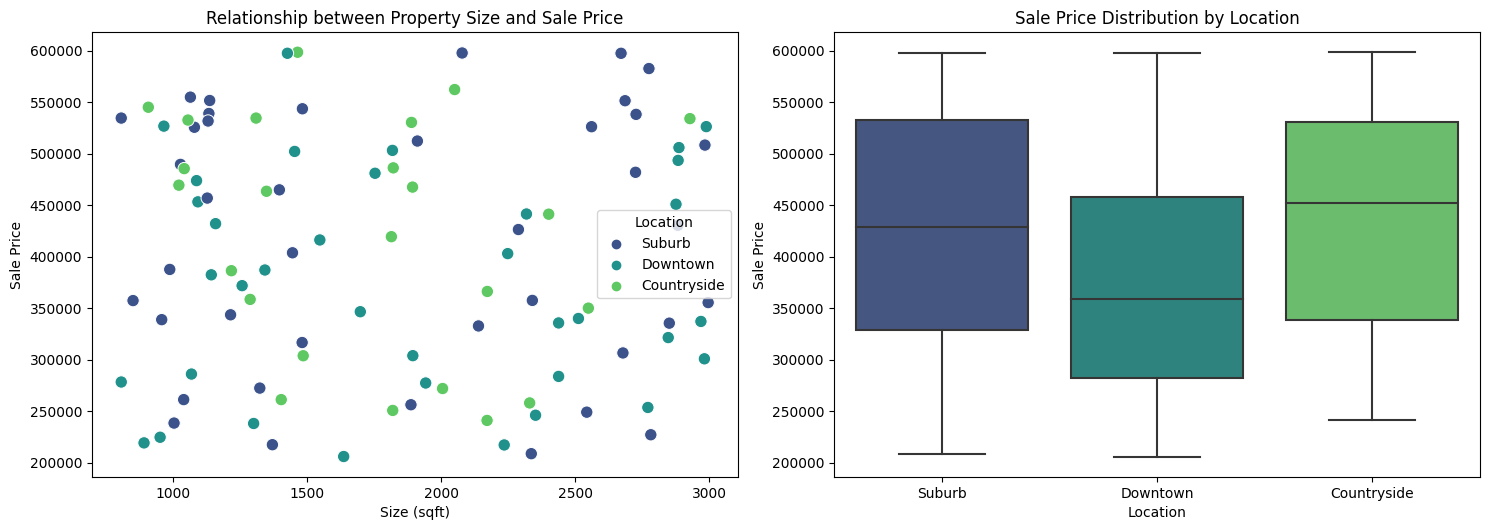

In [4]:
# Proceeding with Relationship Analysis

# Initialize the figure
plt.figure(figsize=(15, 10))

# Scatter plot between Size_sqft and SalePrice
plt.subplot(2, 2, 1)
sns.scatterplot(data=properties_df, x='Size_sqft', y='SalePrice', hue='Location', palette='viridis', s=80)
plt.title('Relationship between Property Size and Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')

# Box plots to compare SalePrice across different Location categories
plt.subplot(2, 2, 2)
sns.boxplot(data=properties_df, x='Location', y='SalePrice', palette='viridis')
plt.title('Sale Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()


### Correlation Analysis

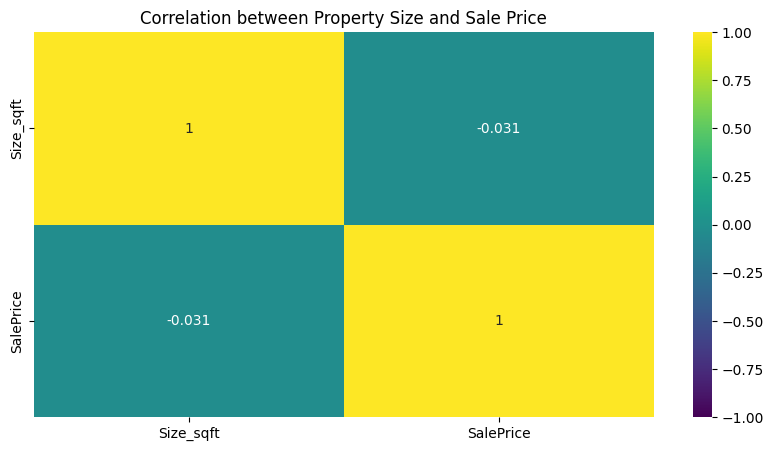

In [5]:
# Proceeding with Correlation Analysis

# Calculate and visualize the correlation between Size_sqft and SalePrice
correlation = properties_df[['Size_sqft', 'SalePrice']].corr()

# Initialize the figure
plt.figure(figsize=(10, 5))

# Plotting the heatmap for correlation
sns.heatmap(correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation between Property Size and Sale Price')

plt.show()

# The heatmap indicates very weak negative correlation between property size 
# and its sale price, which is contrary to the general expectation. 
# It suggest that the size of the property has minimal influence on its price in this dataset.

### Outlier Detection

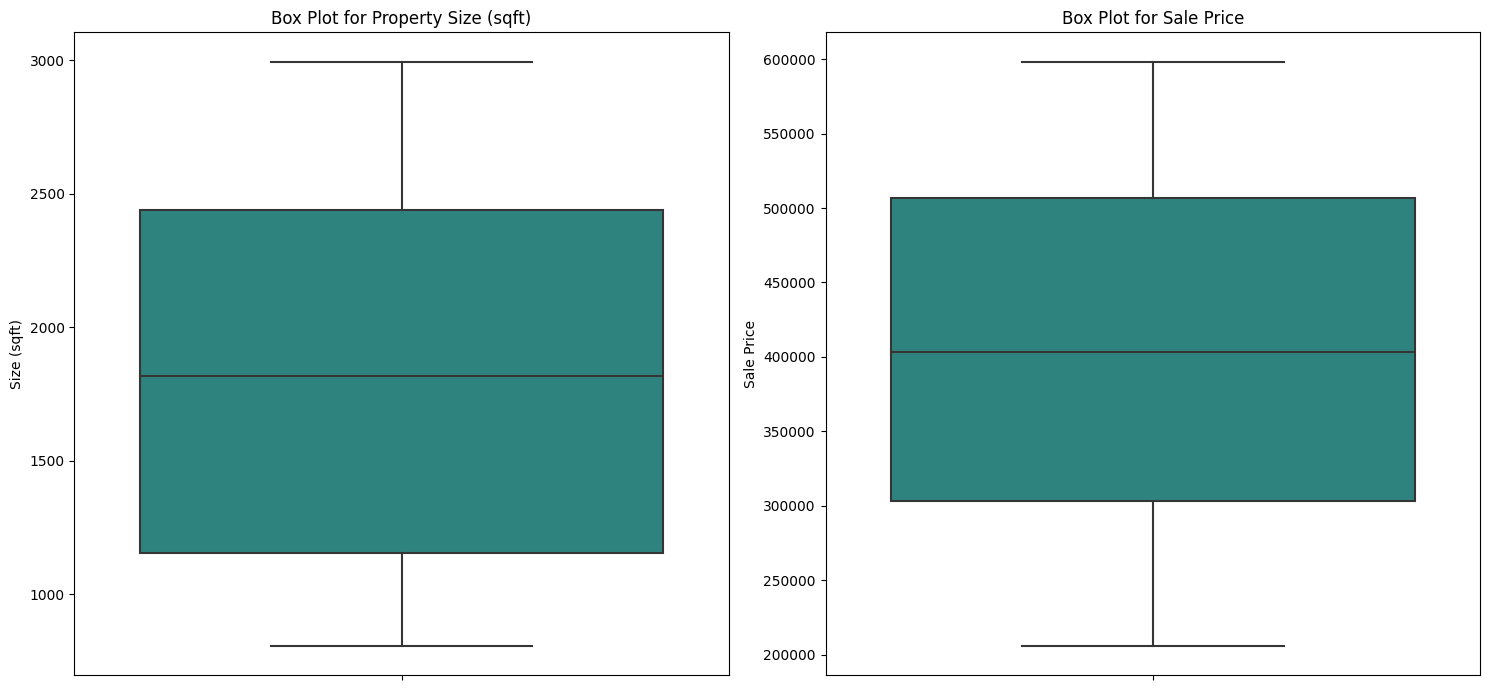

In [6]:
# Proceeding with Outlier Detection

# Initialize the figure
plt.figure(figsize=(15, 7))

# Box plots for Size_sqft and SalePrice to detect outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=properties_df, y='Size_sqft', palette='viridis')
plt.title('Box Plot for Property Size (sqft)')
plt.ylabel('Size (sqft)')

plt.subplot(1, 2, 2)
sns.boxplot(data=properties_df, y='SalePrice', palette='viridis')
plt.title('Box Plot for Sale Price')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

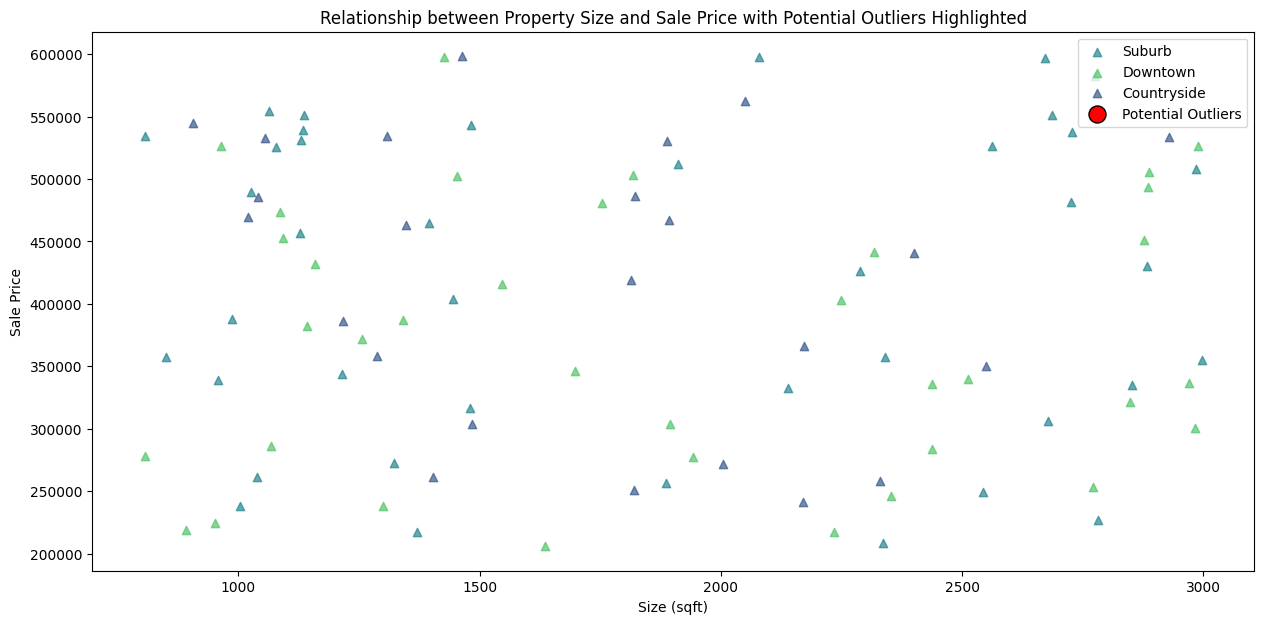

In [7]:
# Identifying potential outliers for SalePrice based on IQR
Q1 = properties_df['SalePrice'].quantile(0.25)
Q3 = properties_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the potential outliers
outliers = properties_df[(properties_df['SalePrice'] < lower_bound) | (properties_df['SalePrice'] > upper_bound)]

# Plotting the scatter plot with potential outliers highlighted
plt.figure(figsize=(15, 7))

# Scatter plot for regular data points
for location, color in zip(['Suburb', 'Downtown', 'Countryside'], [colors[4], colors[7], colors[2]]):
    subset = properties_df[properties_df['Location'] == location]
    plt.scatter(subset['Size_sqft'], subset['SalePrice'], color=color, label=location, marker='^', alpha=0.7)

# Highlighting the outliers
plt.scatter(outliers['Size_sqft'], outliers['SalePrice'], color='red', label='Potential Outliers', s=150, edgecolors='black')

plt.title('Relationship between Property Size and Sale Price with Potential Outliers Highlighted')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.legend()

plt.show()

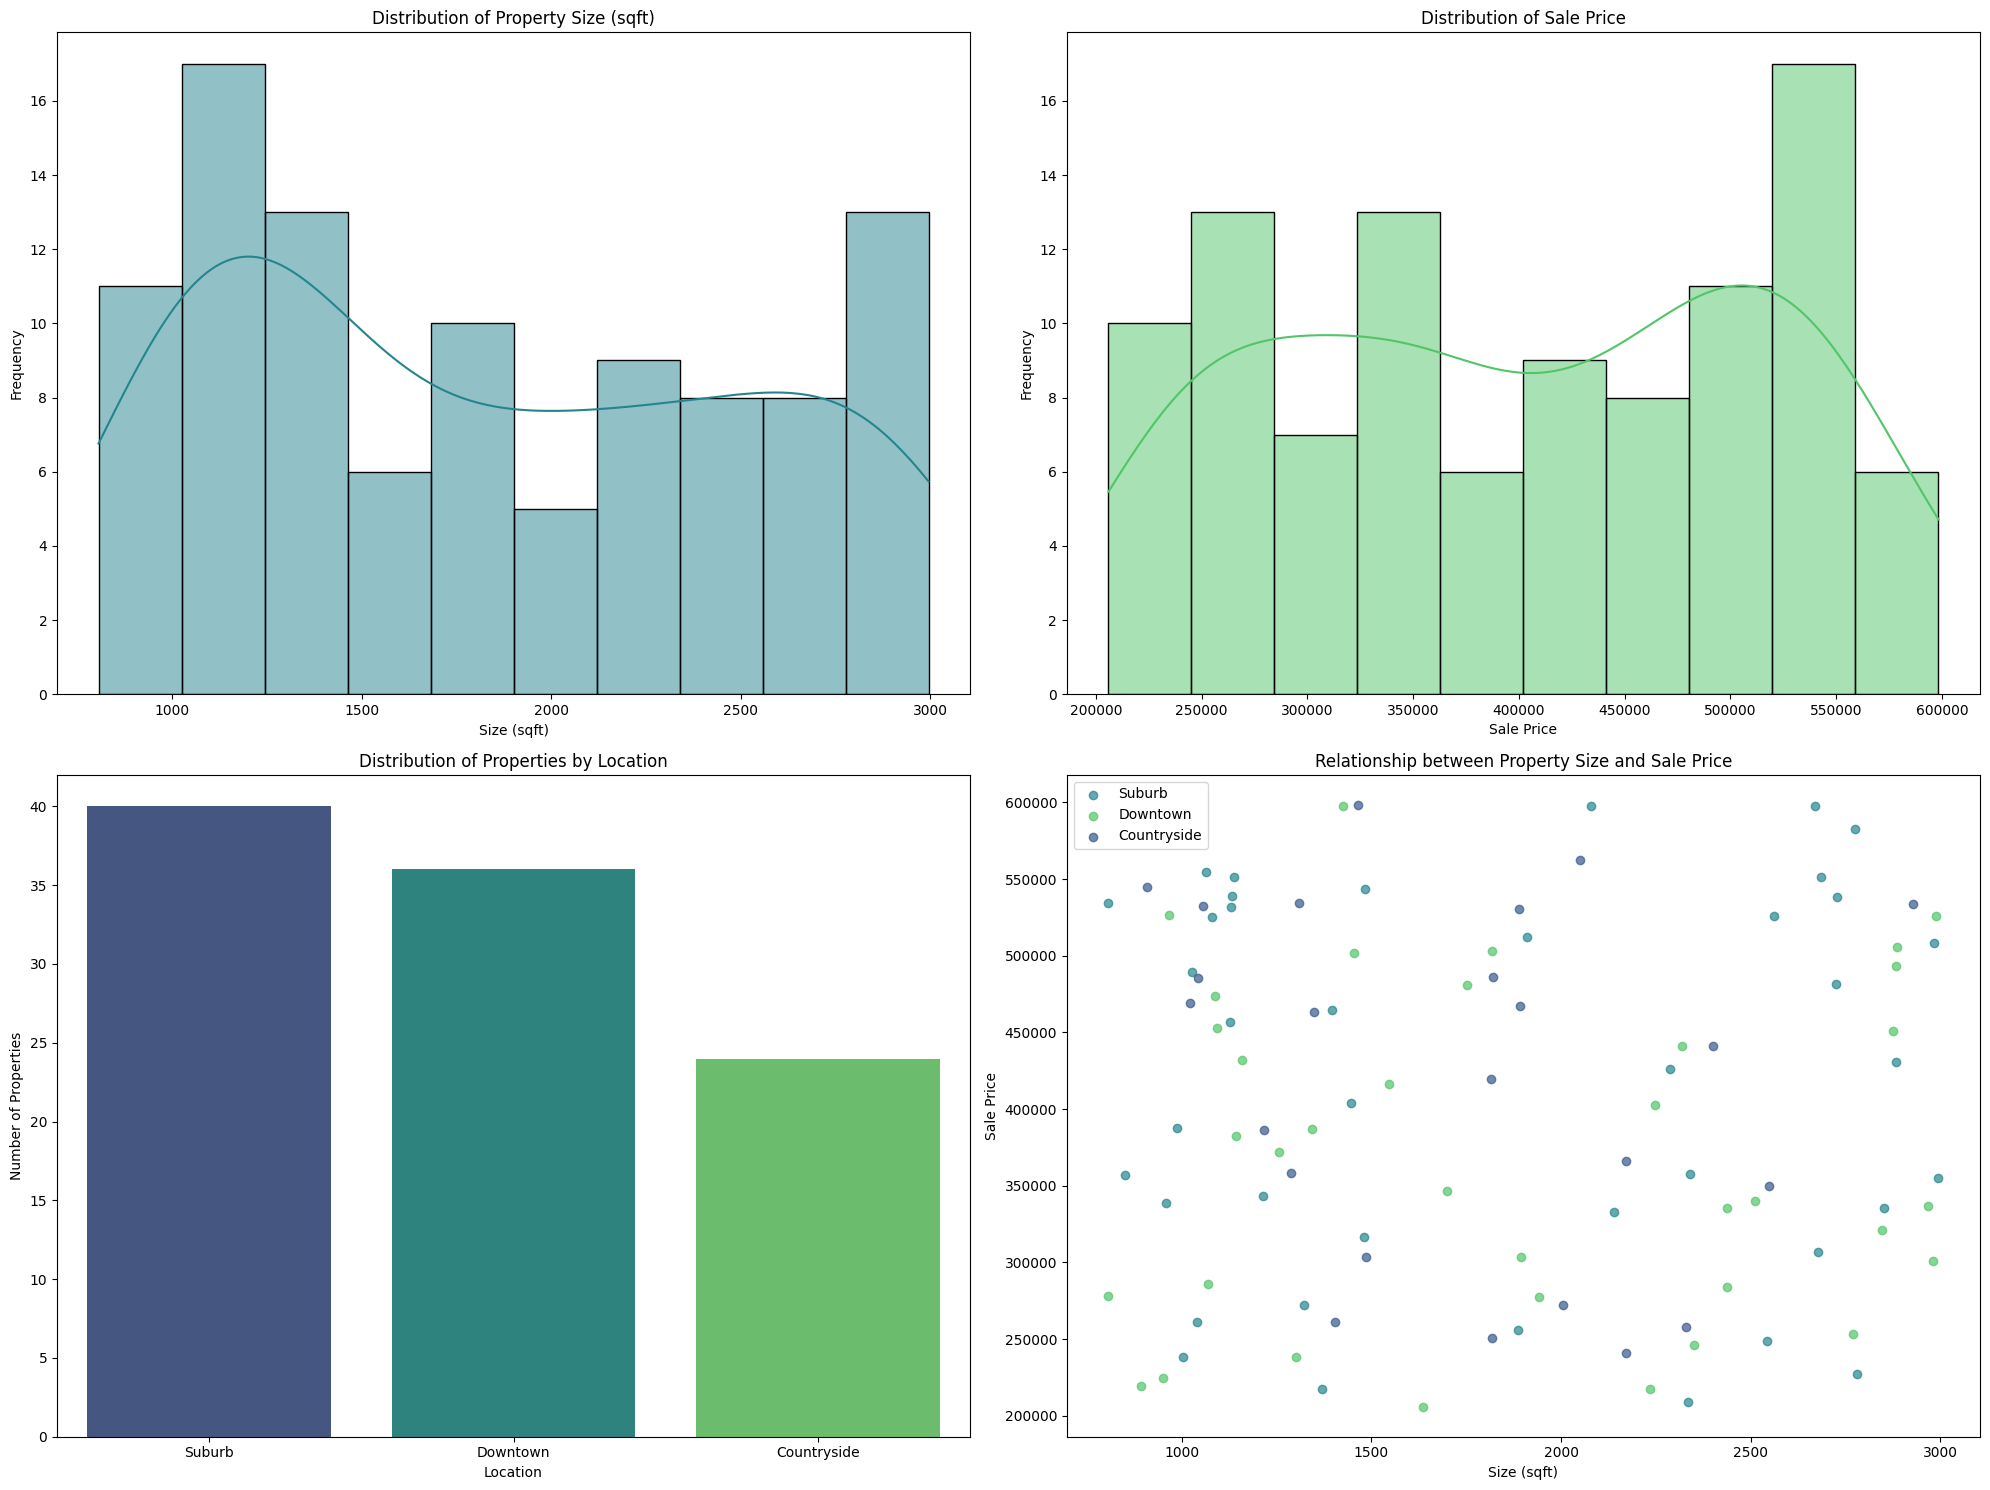

In [8]:
# Adjusting the scatter plot to use circle markers in the consolidated view using a different approach

plt.figure(figsize=(20, 15))

# 1. Distribution of Property Size (sqft)
plt.subplot(2, 2, 1)
sns.histplot(properties_df['Size_sqft'], kde=True, color=colors[4], bins=10)
plt.title('Distribution of Property Size (sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')

# 2. Distribution of Sale Price
plt.subplot(2, 2, 2)
sns.histplot(properties_df['SalePrice'], kde=True, color=colors[7], bins=10)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# 3. Distribution of Properties by Location
plt.subplot(2, 2, 3)
sns.countplot(data=properties_df, x='Location', palette='viridis')
plt.title('Distribution of Properties by Location')
plt.xlabel('Location')
plt.ylabel('Number of Properties')

# 4. Relationship between Property Size and Sale Price with location as hue (circle markers)
plt.subplot(2, 2, 4)
for location, color in zip(['Suburb', 'Downtown', 'Countryside'], [colors[4], colors[7], colors[2]]):
    subset = properties_df[properties_df['Location'] == location]
    plt.scatter(subset['Size_sqft'], subset['SalePrice'], color=color, label=location, alpha=0.7)

plt.title('Relationship between Property Size and Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.legend()

plt.tight_layout()
plt.show()